In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import plotly.express as px
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

Project: Nigeria's Economy  (1990 - 2023)

The link: https://en.wikipedia.org/wiki/Economy_of_Nigeria

In [2]:
df = pd.read_excel(r"C:\Users\BAMIDELE\Desktop\Project\Oyesiji Qowiyy\Nigeria Economy 2.xlsx")

In [3]:
df.head(10)

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1990,0.0740,0.056,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1,1991,0.1301,0.041,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
2,1992,0.4460,0.041,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
3,1993,0.5720,0.041,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
4,1994,0.5703,0.041,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47
5,1995,0.7284,0.041,0.340,3977.38,9845.97,7837.13,21660.49,221.07,21881.56
6,1996,0.2930,0.040,0.252,4133.55,10402.19,8033.13,22568.87,230.83,22799.69
7,1997,0.1070,0.040,0.241,4305.68,10599.70,8325.74,23231.12,238.22,23469.34
8,1998,0.0790,0.040,0.223,4475.24,10641.26,8713.25,23829.76,245.39,24075.15
9,1999,0.0660,0.040,0.649,4703.64,10201.81,9062.14,23967.59,248.18,24215.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                34 non-null     int64  
 1   Inflation rate                      34 non-null     float64
 2   Unemployment                        34 non-null     float64
 3   Government debt                     34 non-null     float64
 4   Agriculture                         34 non-null     float64
 5   Industry                            34 non-null     float64
 6   Services                            34 non-null     float64
 7   GDP at 2010 Constant Basic Prices   34 non-null     float64
 8   NetTaxesOnProducts                  34 non-null     float64
 9   GDP at 2010 Constant Market Prices  34 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.8 KB


In [5]:
df.isnull().sum()

Year                                  0
Inflation rate                        0
Unemployment                          0
Government debt                       0
Agriculture                           0
Industry                              0
Services                              0
GDP at 2010 Constant Basic Prices     0
NetTaxesOnProducts                    0
GDP at 2010 Constant Market Prices    0
dtype: int64

In [6]:
# Get the dimensions of the DataFrame      
print(df.shape)

(34, 10)


In [7]:
# Data cleaning  
df.dropna(inplace=True)  

In [8]:
# Summary statistics  
print(df.describe())  

              Year  Inflation rate  Unemployment  Government debt  \
count    34.000000       34.000000     34.000000        34.000000   
mean   2006.500000        0.180641      0.099421         0.338647   
std       9.958246        0.158712      0.108130         0.203102   
min    1990.000000        0.054000      0.038000         0.073000   
25%    1998.250000        0.094250      0.039250         0.184500   
50%    2006.500000        0.129550      0.041000         0.284500   
75%    2014.750000        0.172250      0.097500         0.430000   
max    2023.000000        0.728400      0.406000         0.750000   

        Agriculture      Industry      Services  \
count     34.000000     34.000000     34.000000   
mean   10168.294118  12804.397647  20523.631765   
std     5613.250422   2620.145710  12487.795389   
min     3464.720000   3735.980000   6849.920000   
25%     4348.070000  10923.630000   8800.472500   
50%     9869.730000  13145.090000  16195.390000   
75%    15222.922500  

Nigeria Economic Indicators (EDA)

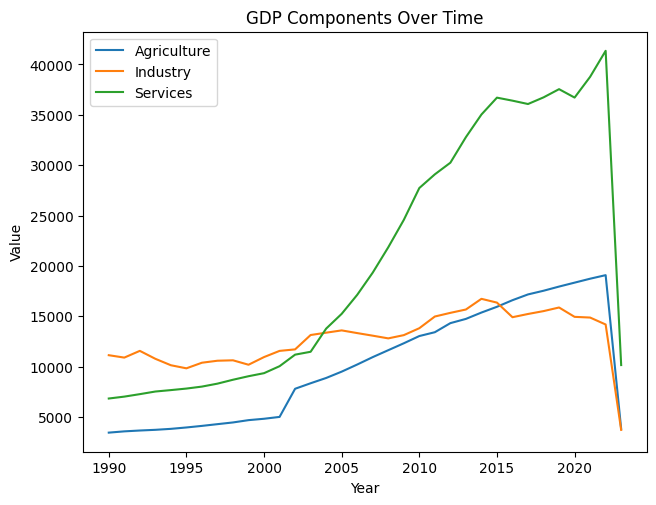

In [9]:
plt.figure(figsize=(16, 12))

# 2. GDP Components Over Time
plt.subplot(2, 2, 2)
plt.plot(df['Year'], df['Agriculture'], label='Agriculture')
plt.plot(df['Year'], df['Industry'], label='Industry')
plt.plot(df['Year'], df['Services'], label='Services')
plt.title('GDP Components Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

Text(0.5, 1.0, 'Correlation Heatmap of Economic Indicators')

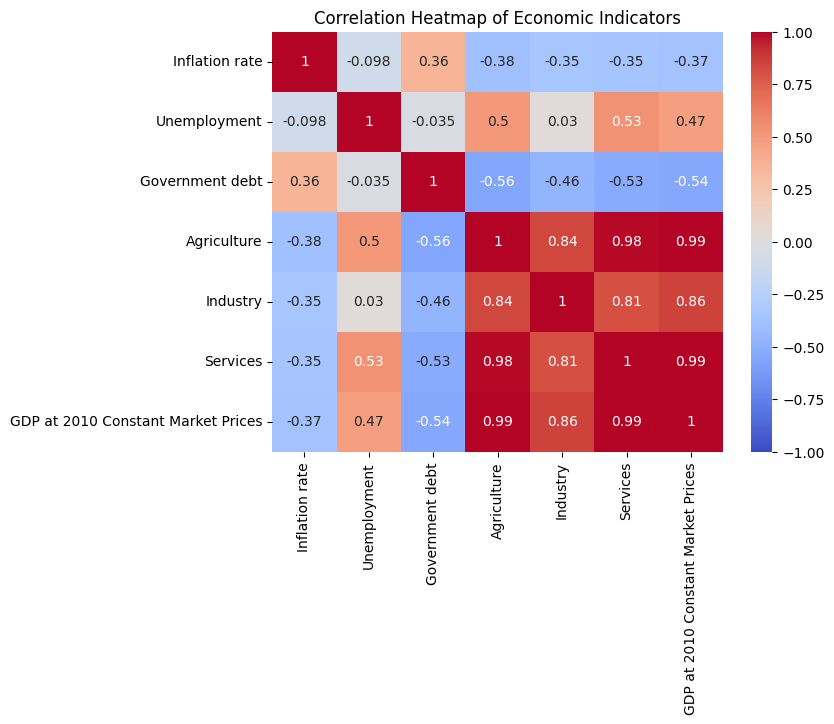

In [10]:
plt.figure(figsize=(16, 12))

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
corr = df[['Inflation rate', 'Unemployment', 'Government debt', 'Agriculture', 'Industry', 'Services', 'GDP at 2010 Constant Market Prices']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Economic Indicators')

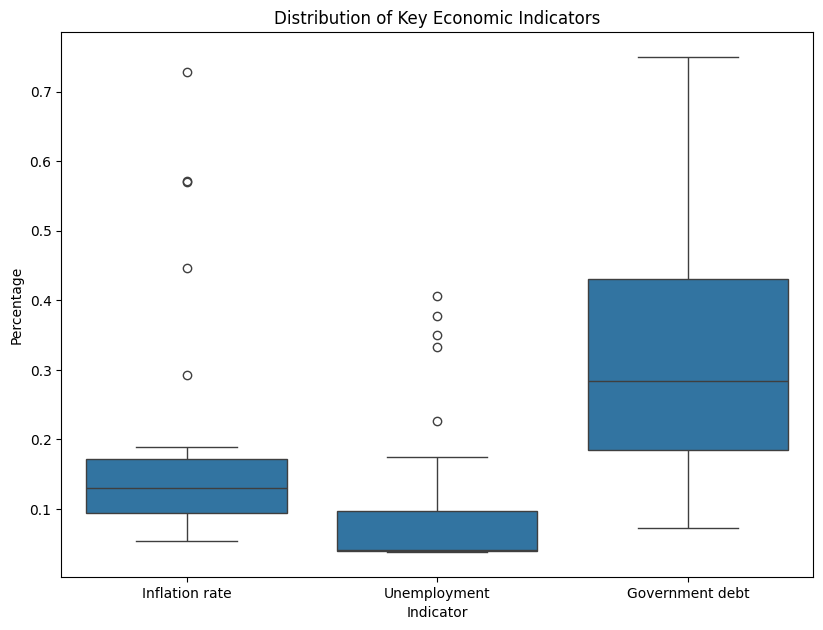

In [11]:
plt.figure(figsize=(16, 12))

# 4. Box Plot of Key Indicators
plt.subplot(2, 2, 4)
df_melt = df.melt(id_vars=['Year'], value_vars=['Inflation rate', 'Unemployment', 'Government debt'])
sns.boxplot(x='variable', y='value', data=df_melt)
plt.title('Distribution of Key Economic Indicators')
plt.xlabel('Indicator')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

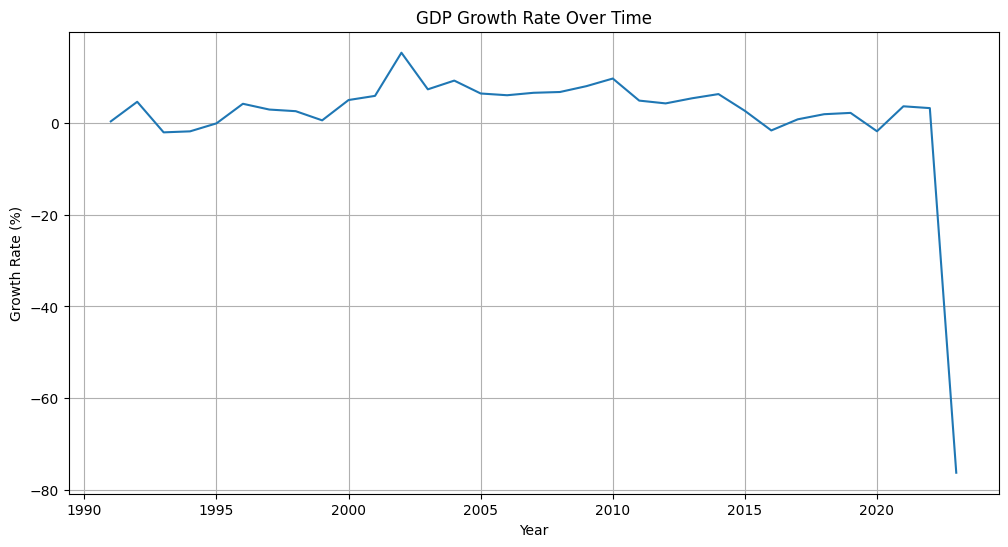

In [12]:
# Additional Analysis: GDP Growth Rate
df['GDP Growth Rate'] = df['GDP at 2010 Constant Market Prices'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df['Year'][1:], df['GDP Growth Rate'][1:])
plt.title('GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

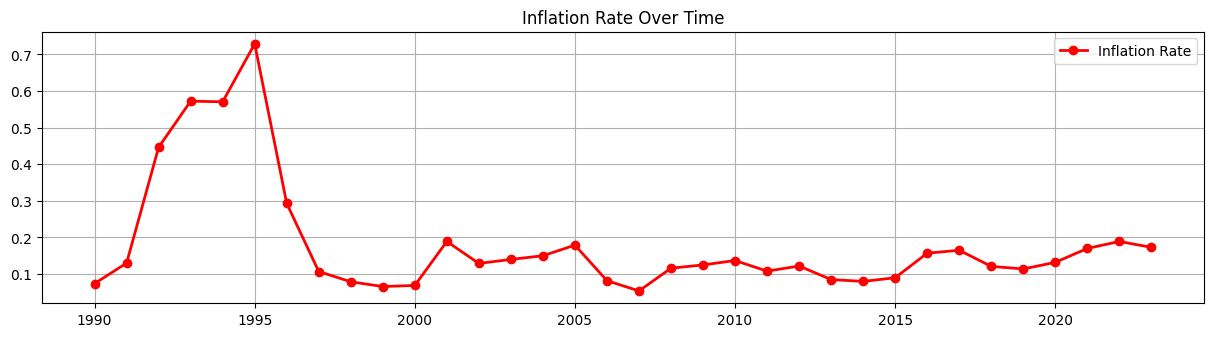

In [13]:
# Analyze multiple economic indicators over time
plt.figure(figsize=(15, 12))

# Plot inflation rate
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Inflation rate'], 'r-', marker='o', linewidth=2, label='Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.grid(True)
plt.legend()


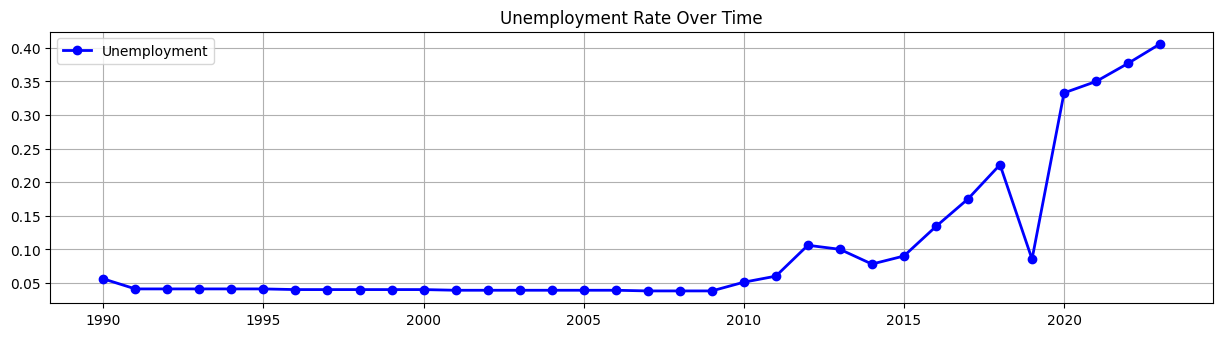

In [14]:
plt.figure(figsize=(15, 12))

# Plot unemployment
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Unemployment'], 'b-', marker='o', linewidth=2, label='Unemployment')
plt.title('Unemployment Rate Over Time')
plt.grid(True)
plt.legend()

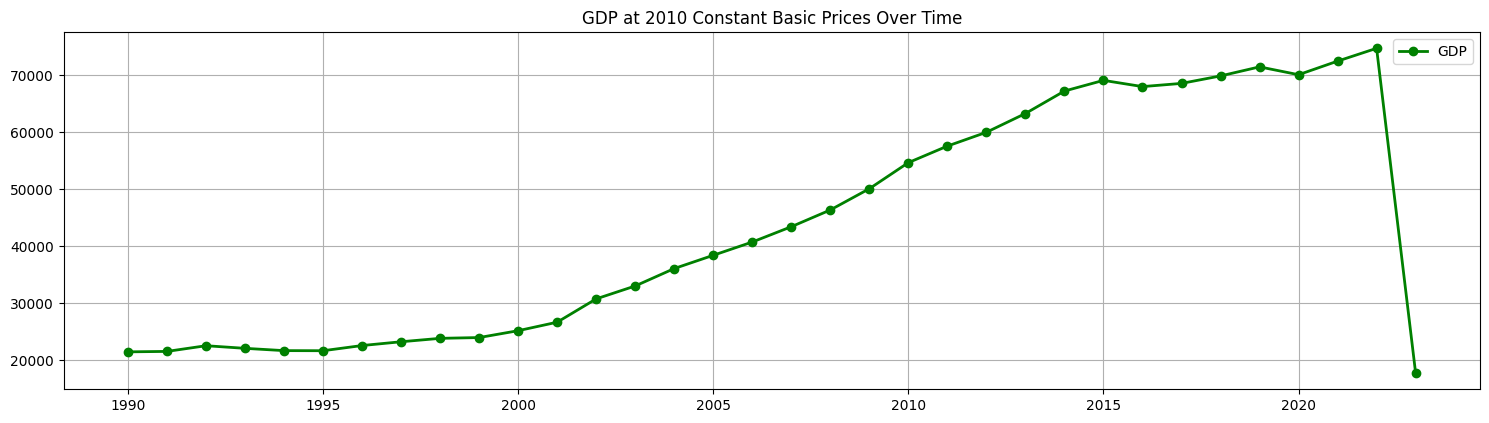

In [15]:
plt.figure(figsize=(15, 12))

# Plot GDP
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['GDP at 2010 Constant Basic Prices'], 'g-', marker='o', linewidth=2, label='GDP')
plt.title('GDP at 2010 Constant Basic Prices Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()

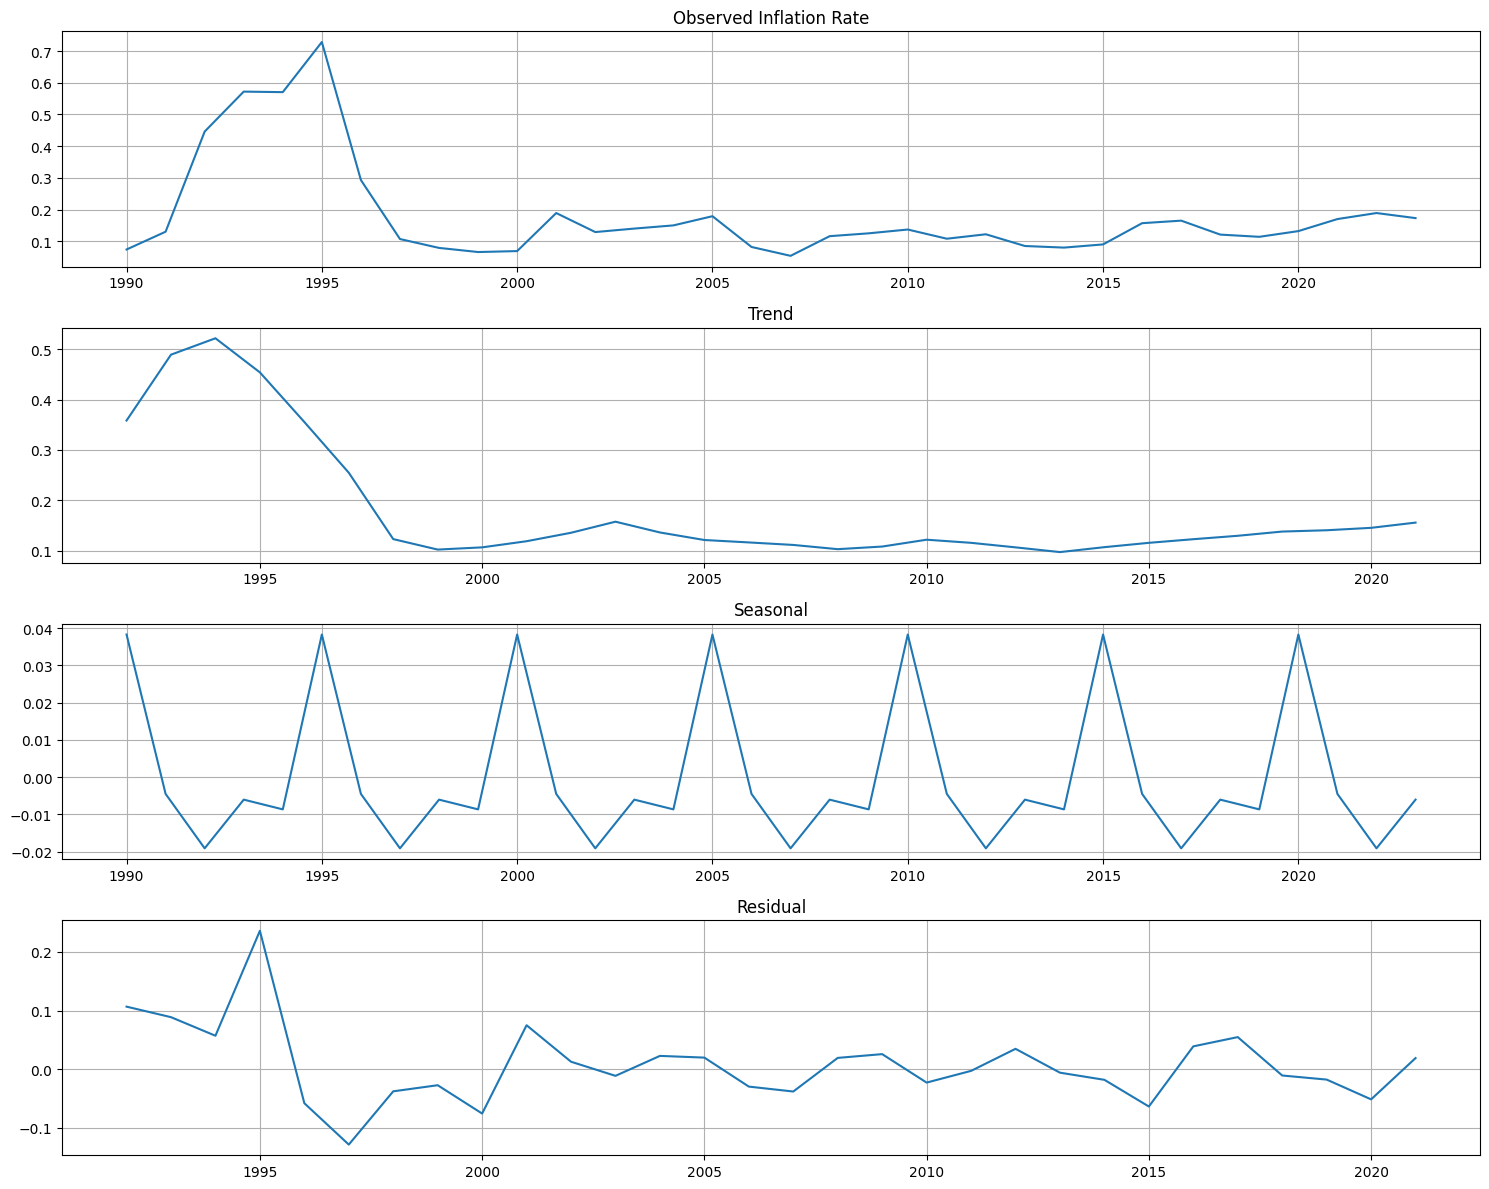

In [16]:
# Time Series Decomposition for Inflation Rate
decomposition = seasonal_decompose(df['Inflation rate'], period=5, model='additive')

plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(df['Year'], decomposition.observed)
plt.title('Observed Inflation Rate')
plt.grid(True)

plt.subplot(412)
plt.plot(df['Year'], decomposition.trend)
plt.title('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(df['Year'], decomposition.seasonal)
plt.title('Seasonal')
plt.grid(True)

plt.subplot(414)
plt.plot(df['Year'], decomposition.resid)
plt.title('Residual')
plt.grid(True)

plt.tight_layout()

In [17]:
# ARIMA Model for Inflation Rate
model = ARIMA(df['Inflation rate'], order=(1,1,1))
results = model.fit()

In [18]:
# Generate forecast
forecast_steps = 5
forecast = results.forecast(steps=forecast_steps)
forecast_index = range(df['Year'].max() + 1, df['Year'].max() + forecast_steps + 1)

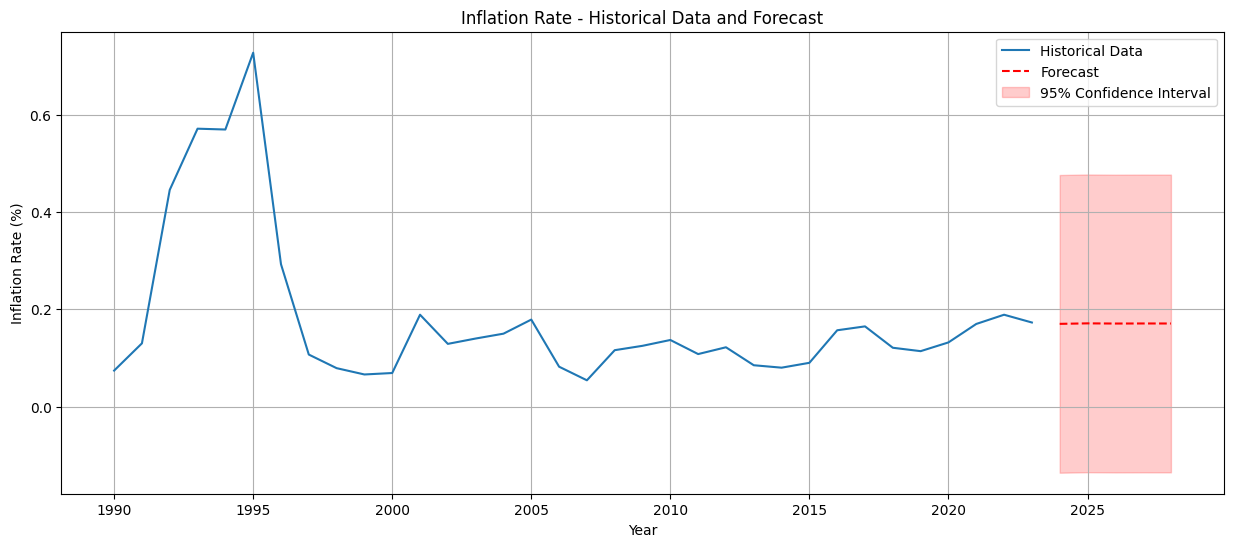

In [19]:
#  Plot original data with forecast
plt.figure(figsize=(15, 6))
plt.plot(df['Year'], df['Inflation rate'], label='Historical Data')
plt.plot(forecast_index, forecast, 'r--', label='Forecast')
plt.fill_between(forecast_index,
                 forecast - 1.96 * np.std(df['Inflation rate']),
                 forecast + 1.96 * np.std(df['Inflation rate']),
                 color='r', alpha=0.2, label='95% Confidence Interval')
plt.title('Inflation Rate - Historical Data and Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)

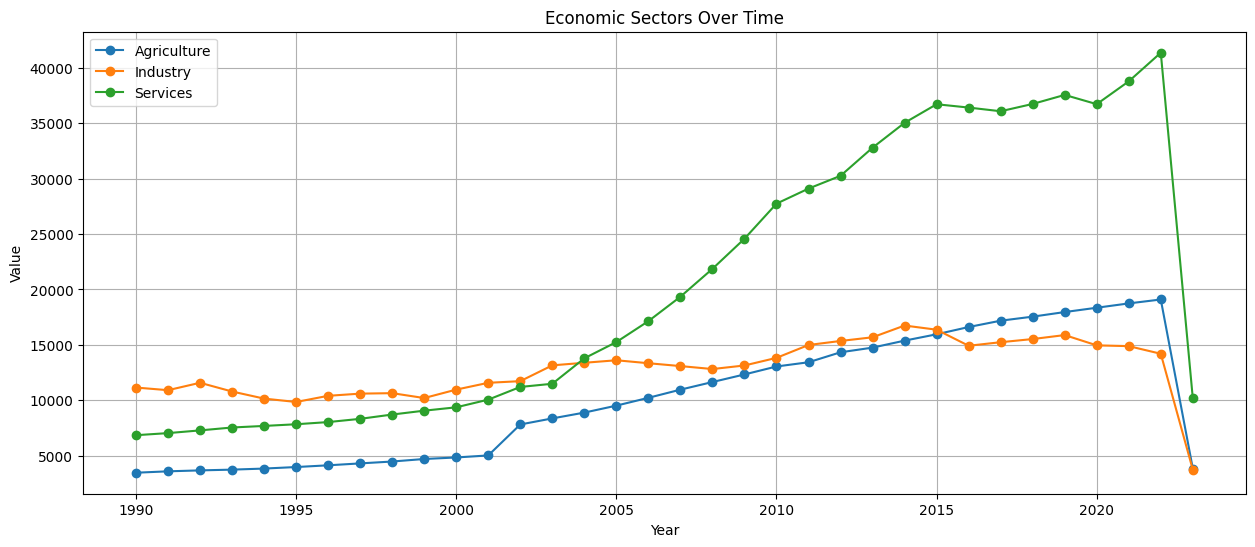

In [20]:
# Economic Sectors Contribution
sectors = ['Agriculture', 'Industry', 'Services']
plt.figure(figsize=(15, 6))
for sector in sectors:
    plt.plot(df['Year'], df[sector], marker='o', label=sector)
plt.title('Economic Sectors Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

In [21]:
# Print ARIMA model and forecasts
print("\nInflation Rate Forecast for next 5 years:")
for year, value in zip(forecast_index, forecast):
    print(f"Year {year}: {value:.2f}%")

print("\nARIMA Model Summary:")
print(results.summary().tables[1])

plt.show()


Inflation Rate Forecast for next 5 years:
Year 2024: 0.17%
Year 2025: 0.17%
Year 2026: 0.17%
Year 2027: 0.17%
Year 2028: 0.17%

ARIMA Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3648      1.647     -0.221      0.825      -3.594       2.864
ma.L1          0.5254      1.627      0.323      0.747      -2.663       3.714
sigma2         0.0122      0.002      5.838      0.000       0.008       0.016


In [22]:
# Prepare the features and target
features = ['Inflation rate', 'Unemployment', 'Government debt', 'Agriculture', 
            'Industry', 'Services']
target = 'GDP at 2010 Constant Basic Prices'

X = df[features]
y = df[target]

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [26]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

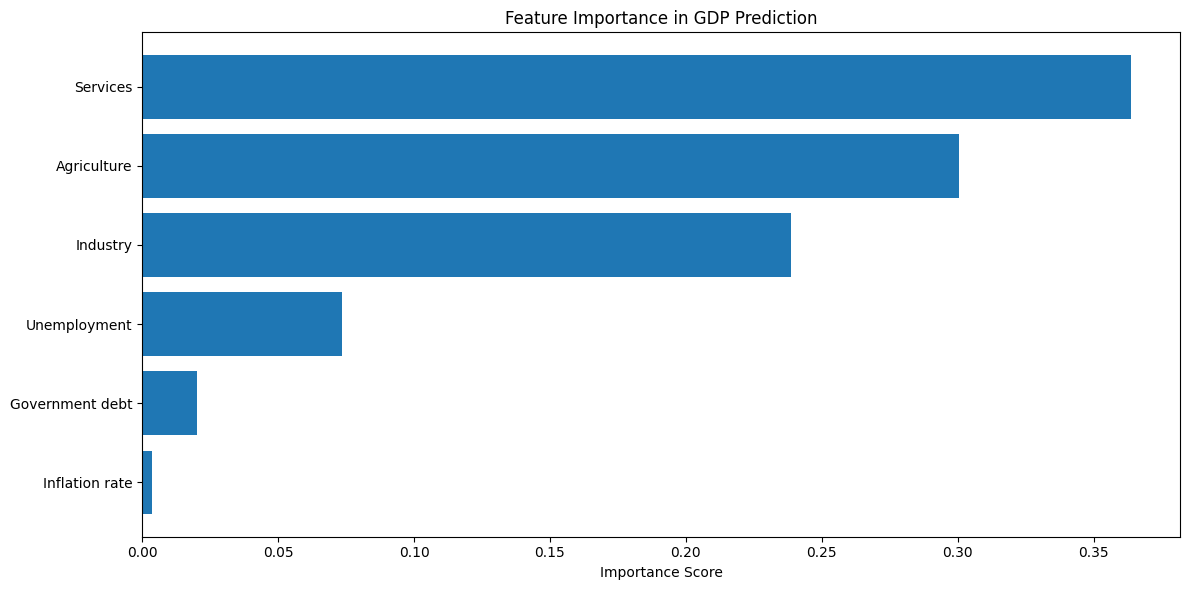

In [27]:
# Feature importance visualization
plt.figure(figsize=(12, 6))
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
importance = importance.sort_values('Importance', ascending=True)

plt.barh(importance['Feature'], importance['Importance'])
plt.title('Feature Importance in GDP Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

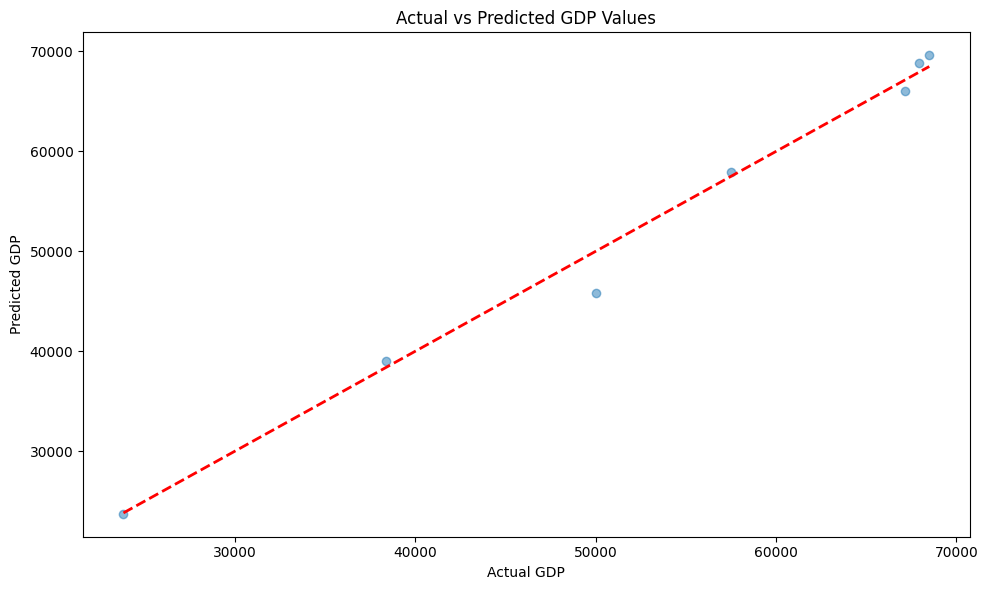

In [47]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP Values')
plt.tight_layout()
plt.show()

In [49]:
# Print model performance metrics
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Model Performance Metrics:
Mean Squared Error: 3120833.66
R-squared Score: 0.99
